# Import modules/ libraries

In [3]:
import os
import sys
import pandas as pd
import numpy as np
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
from IPython.display import Image, Markdown
import seaborn as sns
plt.style.use('seaborn')
from fuzzywuzzy import process
import difflib
from __future__ import print_function, division
import datetime
from datetime import datetime as dt
from scipy.ndimage.filters import generic_filter
import pickle
from __future__ import print_function, division
import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import datasets, linear_model, metrics
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LinearRegression



%matplotlib inline

/Users/Victoria/anaconda/envs/ds/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Victoria/anaconda/envs/ds/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Import all data

In [4]:
with open('all_product_listings_for_modeling.pkl', 'rb') as picklefile: 
    all_product_listings_for_modeling = pickle.load(picklefile)

# Check the imported data

In [5]:
all_product_listings_for_modeling.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'lowest_other_used_price',
       'product_discounts', 'time_on_market', 'other_sellers_boolean',
       'expedited_shipping_boolean', 'num_bullets_description',
       'product_specs_image_boolean', 'num_specs_bullets',
       'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'prime_binary', 'log_price'],
      dtype='object')

In [6]:
all_product_listings_for_modeling.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 171
Data columns (total 17 columns):
num_cust_reviews               156 non-null float64
list_price                     156 non-null float64
avg_cust_review                156 non-null float64
num_answered_questions         156 non-null float64
lowest_other_used_price        156 non-null int64
product_discounts              156 non-null float64
time_on_market                 156 non-null float64
other_sellers_boolean          156 non-null int64
expedited_shipping_boolean     156 non-null int64
num_bullets_description        156 non-null int64
product_specs_image_boolean    156 non-null int64
num_specs_bullets              156 non-null int64
seller_rank_boolean            156 non-null int64
clothing_seller_rank           156 non-null int64
seller_rank_binary_list        156 non-null int64
prime_binary                   156 non-null int64
log_price                      156 non-null float64
dtypes: float64(7), int64(10)
m

In [7]:
all_product_listings_for_modeling['list_price'].sort_values(ascending=False)

126    329.990
136    243.185
144    199.000
160    197.260
156    179.990
120    170.990
148    143.990
105    120.745
111    120.495
92     116.995
38     114.495
149    110.415
97     106.660
36     103.595
93      89.960
85      87.480
101     82.490
94      80.970
7       76.225
0       74.990
108     59.990
65      51.980
91      49.390
168     43.470
146     42.000
127     39.990
99      39.970
69      39.900
98      39.500
139     39.500
        ...   
30      12.490
137     12.490
87      11.990
17      11.990
104     11.990
140     11.890
141     11.890
135     11.890
130     11.890
132     11.890
117     11.890
109     11.890
106     11.890
112     11.890
128     11.890
76      11.890
119     11.890
138     11.700
3       11.290
28      11.090
40      10.990
60      10.490
20      10.490
163      9.990
2        9.990
70       9.990
25       9.980
19       9.970
134      8.500
4        8.390
Name: list_price, Length: 156, dtype: float64

# Create a correlation plot for reach of the features against list_price

### Check num_specs_bullets 

In [8]:
price_by_num_specs_bullets = all_product_listings_for_modeling[['list_price', 'num_specs_bullets']].copy()

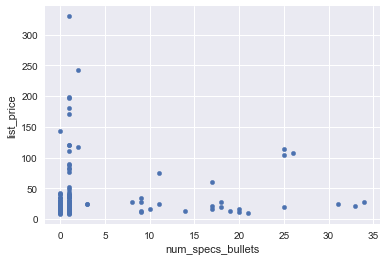

In [9]:
price_by_num_specs_bullets_scatter = price_by_num_specs_bullets.plot.scatter(x= 'num_specs_bullets', y= 'list_price')

There MIGHT be correlation, not sure, will keep as feature for now

### Check num_bullets_description

In [10]:
price_by_num_bullets_description = all_product_listings_for_modeling[['list_price', 'num_bullets_description']].copy()

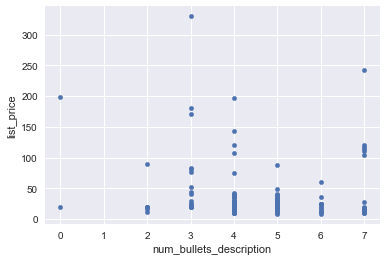

In [11]:
price_by_num_bullets_description_scatter = price_by_num_bullets_description.plot.scatter(x= 'num_bullets_description', y= 'list_price')

There MIGHT be correlation here. I'll keep this feature for now

### Check product_specs_image_boolean

In [12]:
price_by_product_specs_image_boolean = all_product_listings_for_modeling[['list_price', 'product_specs_image_boolean']].copy()

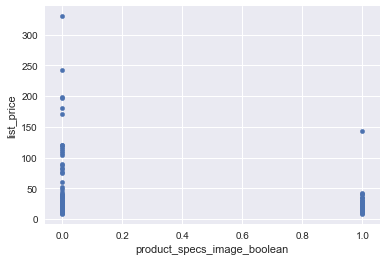

In [13]:
price_by_product_specs_image_boolean_scatter = price_by_product_specs_image_boolean.plot.scatter(x= 'product_specs_image_boolean', y= 'list_price')

MIGHT be correlation? Going to keep this feature just in case.

### Check seller_rank_binary_list

In [14]:
price_by_seller_rank_binary = all_product_listings_for_modeling[['list_price', 'seller_rank_binary_list']].copy()

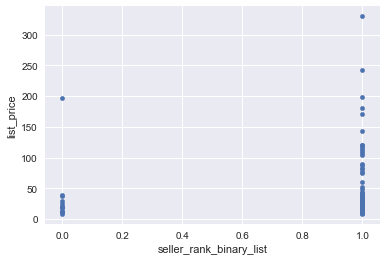

In [15]:
price_by_seller_rank_binary_scatter = price_by_seller_rank_binary.plot.scatter(x= 'seller_rank_binary_list', y= 'list_price')

Seems like there's no correlation, but I'm not sure from this type of graph. I will still include it as a feature

### Check clothing_seller_rank

In [16]:
price_by_clothing_seller_rank = all_product_listings_for_modeling[['list_price', 'clothing_seller_rank']].copy()

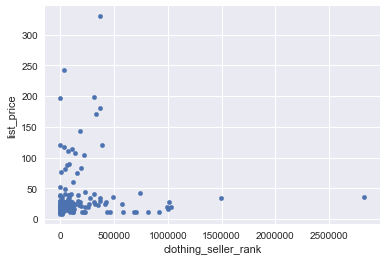

In [17]:
price_by_clothing_seller_rank_scatter = price_by_clothing_seller_rank.plot.scatter(x= 'clothing_seller_rank', y= 'list_price')

Seems like there are crazy outliers. Let's zoom in.

(1, 250)

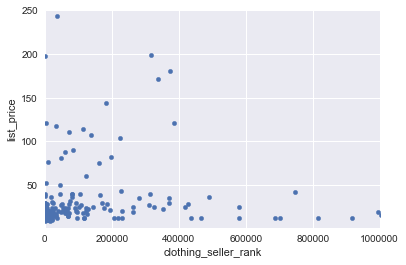

In [18]:
price_by_clothing_seller_rank_scatter_closeup = price_by_clothing_seller_rank.plot.scatter(x= 'clothing_seller_rank', y= 'list_price')
plt.xlim(1,1000000)
plt.ylim(1,250)

Looks like there MIGHT be correlation, or there's just too much noise. I'll keep this feature

### Check expedited_shipping_boolean

In [19]:
price_by_expedited_shipping_boolean = all_product_listings_for_modeling[['list_price', 'expedited_shipping_boolean']].copy()

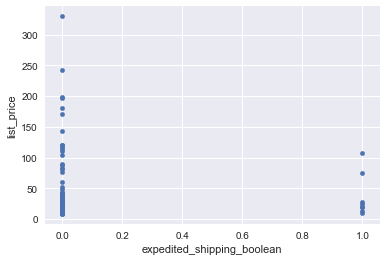

In [20]:
price_by_expedited_shipping_boolean_scatter = price_by_expedited_shipping_boolean.plot.scatter(x= 'expedited_shipping_boolean', y= 'list_price')

As we saw in the raw data and now here, there are only a few products with expedited shipping available, and there is no correlation. Therefore, we will remove this as a feature. 

### Check other_sellers_boolean

In [21]:
price_by_other_sellers_boolean = all_product_listings_for_modeling[['list_price', 'other_sellers_boolean']].copy()

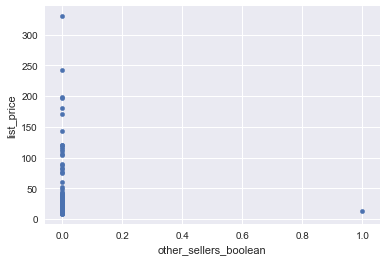

In [22]:
price_by_other_sellers_boolean_scatter = price_by_other_sellers_boolean.plot.scatter(x= 'other_sellers_boolean', y= 'list_price')

From the above and from the raw data, we confirmed that there is only one product with another seller. That said, there is still the one product that has another seller, so there MIGHT be correlation. Let's keep this feature for now.

### Check time on market

In [23]:
price_by_time_on_market = all_product_listings_for_modeling[['list_price', 'time_on_market']].copy()

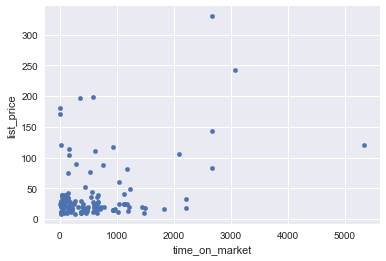

In [24]:
price_by_time_on_market_scatter = price_by_time_on_market.plot.scatter(x= 'time_on_market', y= 'list_price')

It seems like there's are quite a few outliers. Let's dive deeper into the subset with the most datapoints

(0, 200)

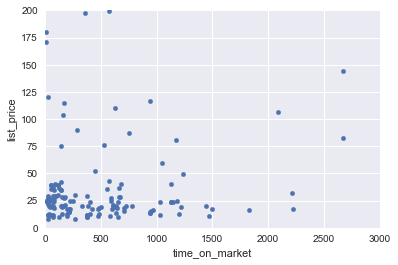

In [25]:
# When we look closer, it does seem like there might be a correlation
price_by_time_on_market_scatter = price_by_time_on_market.plot.scatter(x= 'time_on_market', y= 'list_price')
plt.xlim(0,3000)
plt.ylim(0,200)

(0, 125)

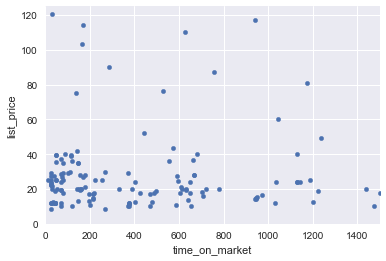

In [26]:
# When we look even closer, though, it seems like there isn't a correlation. But we should keep this feature for analysis just in case.
price_by_time_on_market_scatter = price_by_time_on_market.plot.scatter(x= 'time_on_market', y= 'list_price')
plt.xlim(0,1500)
plt.ylim(0,125)

### Check product_discounts

There should not be a correlation, since the discounts are always applied after the list price. Let's just make sure.

In [27]:
price_by_product_discounts = all_product_listings_for_modeling[['list_price', 'product_discounts']].copy()

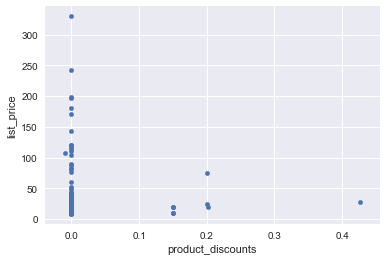

In [28]:
price_by_product_discounts_scatter = price_by_product_discounts.plot.scatter(x= 'product_discounts', y= 'list_price')

As expected, there is no correlation. This will be removed as a feature. 

### Check outliers for lowest_other_used_price

In [29]:
price_by_lowest_other_used_price = all_product_listings_for_modeling[['list_price', 'lowest_other_used_price']].copy()

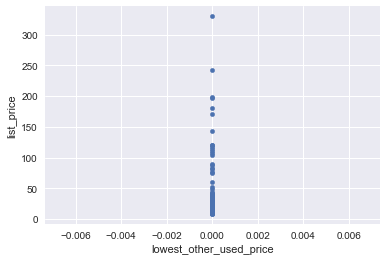

In [30]:
price_by_lowest_other_used_price_scatter = price_by_lowest_other_used_price.plot.scatter(x= 'lowest_other_used_price', y= 'list_price')

As we saw with the raw data before plotting, there were no other used prices associated with the products scraped. Therefore there is no correlation. 

### Check outliers and correlation for num_answered_ questions

In [31]:
price_by_num_answered_questions = all_product_listings_for_modeling[['list_price', 'num_answered_questions']].copy()

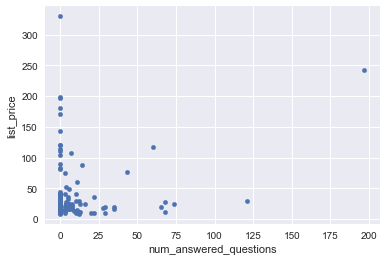

In [32]:
price_by_num_answered_questions_scatter = price_by_num_answered_questions.plot.scatter(x= 'num_answered_questions', y= 'list_price')

As we saw in the raw data before plotting, there are many products with no answered questions. That said, it looks like of the few products that do have more answered questions also had higher list price. There might be slight correlation, however statistically insignificant

### Check outliers and correlation for num_cust_reviews

In [33]:
price_by_num_cust_review = all_product_listings_for_modeling[['list_price', 'num_cust_reviews']].copy()

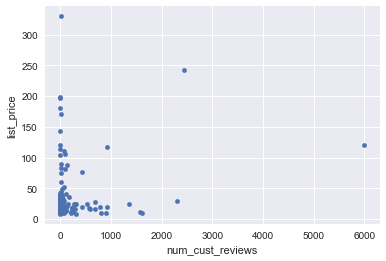

In [34]:
price_by_num_cust_review_scatter = price_by_num_cust_review.plot.scatter(x= 'num_cust_reviews', y= 'list_price')

It seems like there isn't any correlation, or if there is, it's negative. Let's try zooming on on the main section of points

(0, 500)

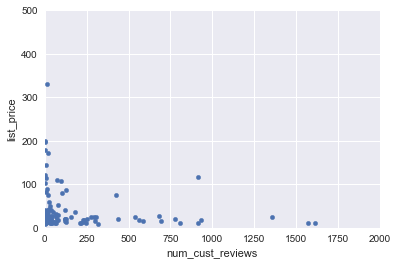

In [35]:
price_by_num_cust_review_scatter = price_by_num_cust_review.plot.scatter(x= 'num_cust_reviews', y= 'list_price')
plt.xlim(0,2000)
plt.ylim(0,500)

(0, 200)

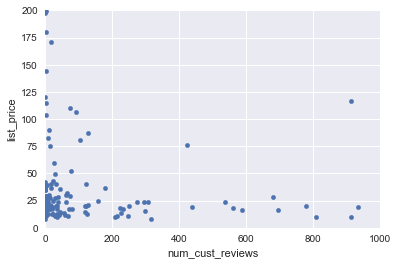

In [36]:
price_by_num_cust_review_scatter = price_by_num_cust_review.plot.scatter(x= 'num_cust_reviews', y= 'list_price')
plt.xlim(0,1000)
plt.ylim(0,200)

(0, 100)

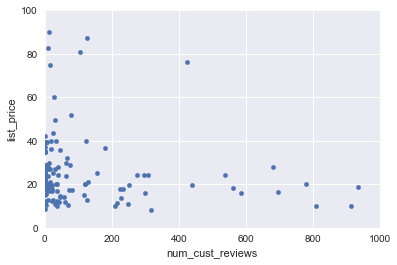

In [37]:
price_by_num_cust_review_scatter = price_by_num_cust_review.plot.scatter(x= 'num_cust_reviews', y= 'list_price')
plt.xlim(0,1000)
plt.ylim(0,100)

(0, 60)

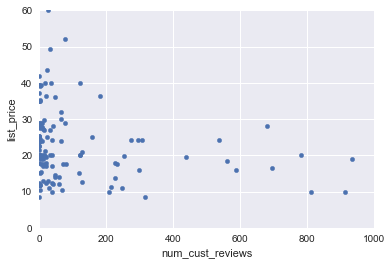

In [38]:
price_by_num_cust_review_scatter = price_by_num_cust_review.plot.scatter(x= 'num_cust_reviews', y= 'list_price')
plt.xlim(0,1000)
plt.ylim(0,60)

Even after zooming in so much (and thus removing many outliers), it seems like there isn't a correlation between num of customer reviews and list price. That said, let's keep this feature for now.

### Check prime_binary

In [39]:
price_by_prime = all_product_listings_for_modeling[['list_price', 'prime_binary']].copy()

In [40]:
price_by_prime.head()

,list_price,prime_binary
0,74.99,1
1,13.99,1
2,9.99,1
3,11.29,1
4,8.39,1


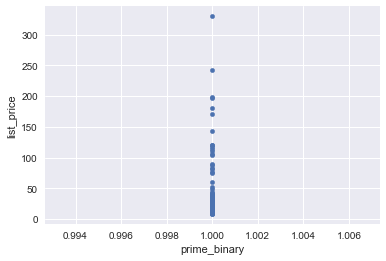

In [41]:
price_by_prime_scatter = price_by_prime.plot.scatter(x= 'prime_binary', y= 'list_price')

As we saw in the raw data, all of the products were prime products. Therefore, it may not be statistically significant nor correlated

### Check outliers and correlation for avg_cust_review

In [42]:
price_by_avg_cust_review = all_product_listings_for_modeling[['list_price', 'avg_cust_review']].copy()

In [43]:
price_by_avg_cust_review.head()

,list_price,avg_cust_review
0,74.99,4.5
1,13.99,4.2
2,9.99,4.5
3,11.29,4.2
4,8.39,4.3


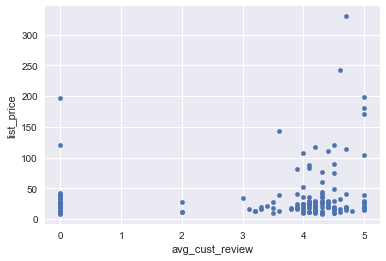

In [44]:
price_by_avg_cust_review_scatter = price_by_avg_cust_review.plot.scatter(x= 'avg_cust_review', y= 'list_price')

As we saw in the raw data, there were quite a few products with no customer reviews. Therefore, there are many zero values for avg_cust_review in the plot above. 

Ignoring those, it seems like there might be a slight correlation between the average customer review and list price.1

(0, 500)

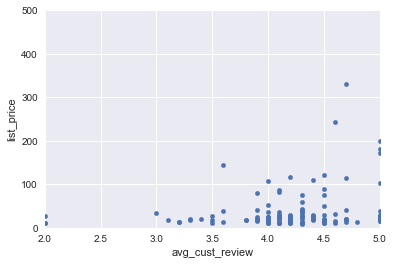

In [45]:
price_by_avg_cust_review_scatter_zoomed = price_by_avg_cust_review.plot.scatter(x= 'avg_cust_review', y= 'list_price')
plt.xlim(2, 5)
plt.ylim(0, 500)

It seems like there are many outliers in terms of having zero reviews yet a wide range of prices. 

# Get the correlation of all features against list_price 

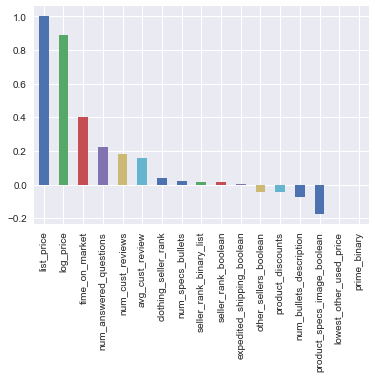

In [46]:
all_product_listings_for_modeling.corr()['list_price'].sort_values(ascending=False).plot(kind='bar')

It's confirmed from the above chart that lowest_other_used_price and _ prime_binary have no correlation to list price, so I will remove those features.

I will also remove expedited shipping and seller rank since they have such low correlations as well. Will also drop product discounts, since the list price of an item is already set before there are discounts applied. 

# Remove uncorrelated features

In [8]:
all_product_listings_for_modeling_list_price = all_product_listings_for_modeling.drop(columns=['lowest_other_used_price',
                                                                                              'prime_binary', 'log_price'])

In [9]:
all_product_listings_for_modeling_log_price = all_product_listings_for_modeling.drop(columns=['lowest_other_used_price',
                                                                                              'prime_binary', 'list_price'])

# Add the square of features

In [12]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list'],
      dtype='object')

In [10]:
def make_feature_degree_2(column):
    feature_degree_2 = []
    try: 
        for row in column:
            feature_degree_2.append(row**2)
    except:
        feature_degree_2.append(0)
    return feature_degree_2

In [14]:

all_product_listings_for_modeling_list_price['num_cust_review_squared'] = make_feature_degree_2(all_product_listings_for_modeling_list_price['num_cust_reviews'])

In [15]:
all_product_listings_for_modeling_list_price['avg_cust_review_squared'] = make_feature_degree_2(all_product_listings_for_modeling_list_price['avg_cust_review'])

In [16]:
all_product_listings_for_modeling_list_price['num_answered_questions_squared'] = make_feature_degree_2(all_product_listings_for_modeling_list_price['num_answered_questions'])

In [17]:
all_product_listings_for_modeling_list_price.columns

Index(['num_cust_reviews', 'list_price', 'avg_cust_review',
       'num_answered_questions', 'product_discounts', 'time_on_market',
       'other_sellers_boolean', 'expedited_shipping_boolean',
       'num_bullets_description', 'product_specs_image_boolean',
       'num_specs_bullets', 'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [18]:
all_product_listings_for_modeling_log_price['num_cust_review_squared'] = make_feature_degree_2(all_product_listings_for_modeling_log_price['num_cust_reviews'])

In [19]:
all_product_listings_for_modeling_log_price['avg_cust_review_squared'] = make_feature_degree_2(all_product_listings_for_modeling_log_price['avg_cust_review'])

In [20]:
all_product_listings_for_modeling_log_price['num_answered_questions_squared'] = make_feature_degree_2(all_product_listings_for_modeling_log_price['num_answered_questions'])

In [21]:
all_product_listings_for_modeling_log_price.columns

Index(['num_cust_reviews', 'avg_cust_review', 'num_answered_questions',
       'product_discounts', 'time_on_market', 'other_sellers_boolean',
       'expedited_shipping_boolean', 'num_bullets_description',
       'product_specs_image_boolean', 'num_specs_bullets',
       'seller_rank_boolean', 'clothing_seller_rank',
       'seller_rank_binary_list', 'log_price', 'num_cust_review_squared',
       'avg_cust_review_squared', 'num_answered_questions_squared'],
      dtype='object')

In [22]:
with open('all_product_listings_for_modeling_list_price.pkl', 'wb') as picklefile:
        pickle.dump(all_product_listings_for_modeling_list_price, picklefile)

In [23]:
with open('all_product_listings_for_modeling_log_price.pkl', 'wb') as picklefile:
        pickle.dump(all_product_listings_for_modeling_log_price, picklefile)